Original image shape: (1105, 1105)


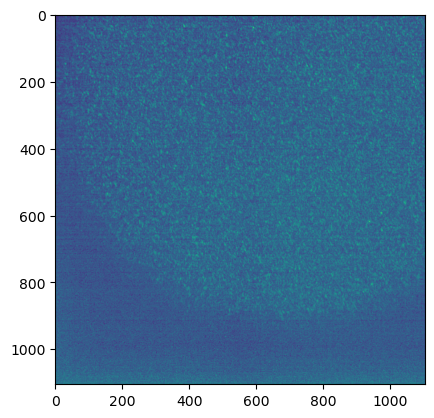

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the PNG image
image = Image.open('BBRedMOTBFieldOff.jpeg').crop((324, 175, 1429, 1280)).convert("L") # ((left, upper, right, lower))

# Convert the image to a NumPy array
image_array = np.array(image)

# Display the original image and its shape
plt.imshow(image_array)
print("Original image shape:", image_array.shape)

Original image shape: (1105, 1105)


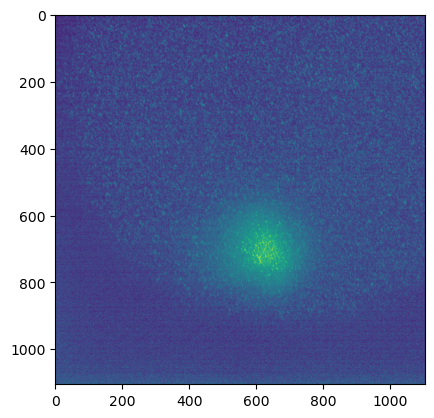

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the PNG image
image2 = Image.open('BBRedMOTBFieldOn.jpeg').crop((324, 175, 1429, 1280)).convert("L") # ((left, upper, right, lower))

# Convert the image to a NumPy array
image2_array = np.array(image2)

# Display the original image and its shape
plt.imshow(image2_array)
print("Original image shape:", image2_array.shape)

### Now plotting them side by side

In [4]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3.5)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = False
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

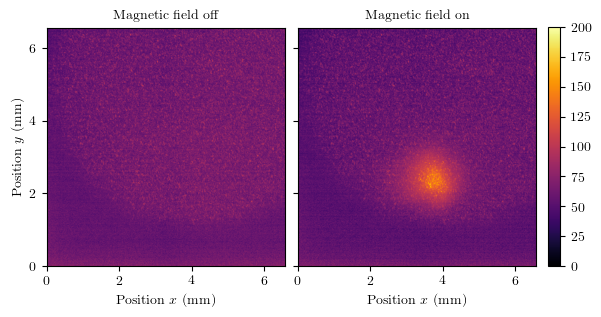

In [16]:
cmap = 'inferno'

# plot two figures side by side
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

# Change axis - calculate extent: [xmin, xmax, ymin, ymax] in μm
pixel_size_um = (1/0.58)*3.45/1000 # how many mm per pixel

extent = [0, image_array.shape[1] * pixel_size_um,   # x-axis: 0 to 1200 * 5
          0, image2_array.shape[0] * pixel_size_um]   # y-axis: 0 to 1200 * 5

im1 = ax1.imshow(image_array,cmap=cmap,extent=extent,vmin=0,vmax=200)

im2 = ax2.imshow(image2_array,cmap=cmap,extent=extent,vmin=0,vmax=200)

# plot colorbar
cbar = fig.colorbar(im2, ax=[ax1, ax2], shrink=0.7, pad=0.025)

ax1.set_yticks([0,2,4,6])

ax1.set_xlabel(r"Position $x$ (mm)")
ax2.set_xlabel(r"Position $x$ (mm)")
ax1.set_ylabel(r"Position $y$ (mm)")

ax1.set_title("Magnetic field off")
ax2.set_title("Magnetic field on")

plt.savefig("250421RedMOTVerificationsBField.pdf",dpi=300)

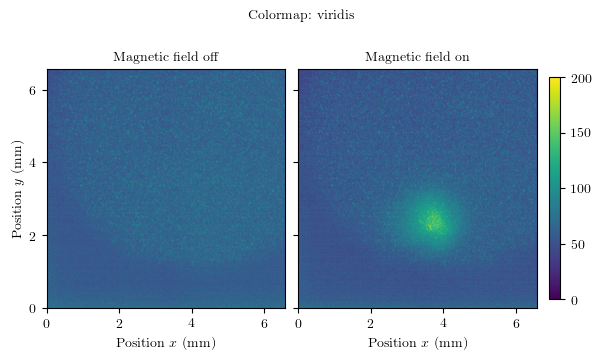

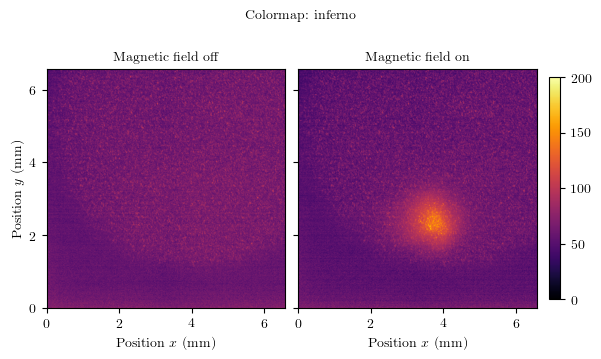

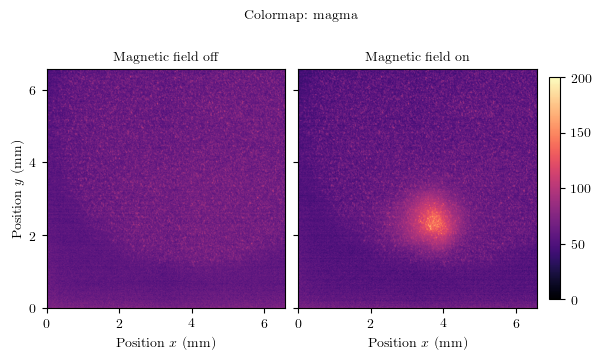

In [14]:

for cmap in ['viridis', 'inferno', 'magma']:
    # plot two figures side by side
    fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True, sharey=True, constrained_layout=True)
    # plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

    # That warning is because matplotlib’s default layout engine has changed in recent
    # versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
    # If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
    # If you're manually adjusting spacing, disable constrained_layout when you create the figure:

    # Change axis - calculate extent: [xmin, xmax, ymin, ymax] in μm
    pixel_size_um = (1/0.58)*3.45/1000 # how many mm per pixel

    extent = [0, image_array.shape[1] * pixel_size_um,   # x-axis: 0 to 1200 * 5
            0, image2_array.shape[0] * pixel_size_um]   # y-axis: 0 to 1200 * 5

    im1 = ax1.imshow(image_array,cmap=cmap,extent=extent,vmin=0,vmax=200)

    im2 = ax2.imshow(image2_array,cmap=cmap,extent=extent,vmin=0,vmax=200)

    # plot colorbar
    cbar = fig.colorbar(im2, ax=[ax1, ax2], shrink=0.7, pad=0.025)

    ax1.set_yticks([0,2,4,6])

    ax1.set_xlabel(r"Position $x$ (mm)")
    ax2.set_xlabel(r"Position $x$ (mm)")
    ax1.set_ylabel(r"Position $y$ (mm)")

    ax1.set_title("Magnetic field off")
    ax2.set_title("Magnetic field on")

    plt.suptitle(f"Colormap: {cmap}")